In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
from scipy.optimize import Bounds

In [95]:
N = 100
x = np.random.rand(N)
y = 3*x+4 + np.random.randn(N)

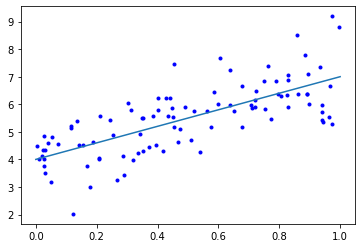

In [41]:
plt.plot(x,y, "b.")
plt.plot([0,1], [4,7])

In [42]:
X = np.c_[np.ones((N,1)), x]
theta = np.linalg.inv(X.T@X)@X.T@y
theta

array([4.00753289, 3.00481248])

In [43]:
def ols(beta):
    return np.sum((y-X@beta)**2)
    

In [44]:
x0 = np.array([0,0])
minimize(ols, x0)

      fun: 75.40301667563124
 hess_inv: array([[ 0.01797172, -0.02640914],
       [-0.02640914,  0.05376641]])
      jac: array([-9.53674316e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([4.00753287, 3.00481249])

In [63]:
a = 100
A = np.identity(2)
A[0,0]=0
X_b = np.c_[np.ones((N,1)), x]
X_b
theta_r = np.linalg.inv(X_b.T@X_b+(a*A))@X_b.T@y
theta_r

array([5.35787079, 0.25565733])

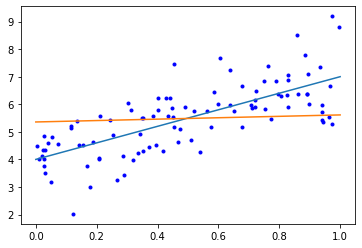

In [64]:
plt.plot(x,y, "b.")
plt.plot([0,1], [4,7])
plt.plot([0,1], [theta_r[0],theta_r[0]+theta_r[1]])

In [65]:
def ols_R(beta,a=1):
    return np.sum((y-X_b@beta)**2) + a*np.sum(np.square(beta[1:]))

In [66]:
x0 = np.array([5,0])
beta = minimize(ols_R, x0, args=(100))
beta

      fun: 152.22324958670816
 hess_inv: array([[ 0.61790956, -0.48880984],
       [-0.48880984,  0.39153299]])
      jac: array([-3.81469727e-06,  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([5.35787078, 0.25565733])

In [71]:
def lasso(beta,a=1):
    return np.sum(np.square(y-X_b@beta))+a*np.sum(np.abs(beta[1:]))

In [73]:
beta = minimize(lasso, x0)
beta

      fun: 78.38094595013743
 hess_inv: array([[ 0.01803682, -0.02652372],
       [-0.02652372,  0.05396809]])
      jac: array([ 5.72204590e-06, -2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([4.03394223, 2.9510457 ])

In [88]:
from scipy.stats import norm
def mle(beta):
    return -np.log(np.prod(norm.pdf(y-X_b@beta)))

beta = minimize(mle,x0)
beta

      fun: 129.59536165828288
 hess_inv: array([[ 0.03607309, -0.05296299],
       [-0.05296299,  0.10769281]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.0075329 , 3.00481244])

In [84]:
##1000 random sample from standard normal dist

samples = norm.rvs(size=1000)

n = norm(10,4)
samples = n.rvs(size=10)
samples

array([10.8985287 ,  8.61739144, 11.12984856, 14.70586633, 10.45028215,
        8.93639698,  6.65128472, 10.14215279,  8.27734329, 12.26555283])

In [83]:
# dir(minimize)

In [86]:
np.log([1,2,3])

array([0.        , 0.69314718, 1.09861229])

In [167]:
def p(X,beta):
    return np.exp(beta[0]+beta[1]*X)/(1+np.exp(beta[0]+beta[1]*X))

def mle_lo(beta):
    return -1*np.log(np.prod(p(X[y_l], beta))*np.prod(1-p(X[~y_l],beta)))

x0 = [0,0]

m = minimize(mle_lo,x0)

m.x

array([ 1.12441538, -0.23945445])

In [162]:
xvec = np.linspace(-2.5,7,100)
yvec = np.linspace(-2.5,7,100)
zvec = np.empty((len(xvec),len(yvec)))

for i in range(len(xvec)):
    for j in range(len(yvec)):
        zvec[i,j] = mle_lo([xvec[i],yvec[j]])

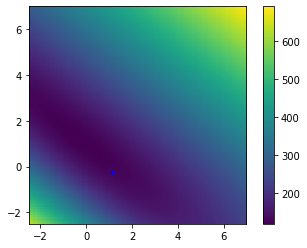

In [175]:
plt.imshow(zvec,extent=[-2.5,7,-2.5,7], origin="lower")
plt.plot(m.x[0],m.x[1], "b.")
plt.colorbar()

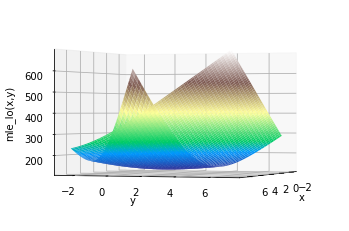

In [179]:
from mpl_toolkits.mplot3d import Axes3D


xgrid, ygrid = np.meshgrid(xvec,yvec)
xy = np.stack([xgrid,ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(0, 20)
ax.plot_surface(xgrid, ygrid, zvec, cmap="terrain")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("mle_lo(x,y)")
plt.show()

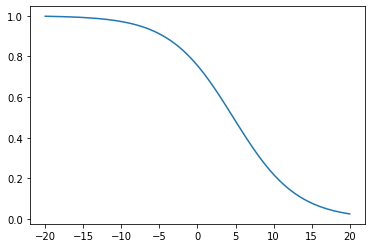

In [187]:
plt. plot(np.linspace(-20,20,1000000),p(np.linspace(-20,20,1000000), m.x) )